# PFDA Project - Winter 2024
*****

## 1. Introduction

This notebook contains an analysis of historical windspeed data recorded by Met Éireann at the Johnstown Castle weather station<sup>[6]</sup> in County Wexford between 12 August 2003 and 01 December 2024<sup>[1]</sup>.

As of 2022, there are 18 windfarms in County Wexford<sup>[9]</sup>. It should be noted, however, that this number may not be an accurate reflection of the actual number of windfarms as it may include extensions to existing windfarms and does not include farms/turbines which are not connected to the main electricity grid<sup>[10]</sup>. One of the closest windfarms to the Johnstown Castle weather station is located at Carnsore Point<sup>[7]</sup>, approximately 16km from the weather station<sup>[5]</sup>.

## 2. Imports

In [67]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## 3. Loading and cleaning the dataset

In [68]:
# load data
df=pd.read_csv("hly1775.csv", skiprows=17, low_memory=False)
df

date  ind rain  ind.1  temp  ind.2  wetb dewpt vappr  \
0       12-aug-2003 01:00   -1           4            4                     
1       12-aug-2003 02:00   -1           4            4                     
2       12-aug-2003 03:00   -1           4            4                     
3       12-aug-2003 04:00   -1           4            4                     
4       12-aug-2003 05:00   -1           4            4                     
...                   ...  ...  ...    ...   ...    ...   ...   ...   ...   
186763  30-nov-2024 20:00    0  0.0      0  13.1      0  12.7  12.5  14.5   
186764  30-nov-2024 21:00    0  0.0      0  13.2      0  12.7  12.3  14.3   
186765  30-nov-2024 22:00    0  0.0      0  13.3      0  12.8  12.3  14.3   
186766  30-nov-2024 23:00    0  3.0      0  13.0      0  12.8  12.6  14.6   
186767  01-dec-2024 00:00    0  0.8      0  13.0      0  12.9  12.7  14.7   

       rhum     msl  ind.3 wdsp  ind.4 wddir  
0                        7           7        
1                        7           7        
2                        7           7        
3                        7           7        
4                        7           7        
...     ...     ...    ...  ...    ...   ...  
186763   96  1010.7      2   17      2   190  
186764   94  1010.3      2   18      2   180  
186765   93  1010.0      2   18      2   190  
186766   97  1009.8      2   15      2   190  
186767   98  1009.3      2   13      2   190  

[186768 rows x 15 columns]

In [69]:
# split date column into date and time columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)
# convert date column to datetime 
df["date"]=df['date'].astype('datetime64[ns]')
# set date column as index column
df.set_index('date', inplace=True)
# sanity check
df

ind rain  ind.1  temp  ind.2  wetb dewpt vappr rhum     msl  \
date                                                                      
2003-08-12   -1           4            4                                  
2003-08-12   -1           4            4                                  
2003-08-12   -1           4            4                                  
2003-08-12   -1           4            4                                  
2003-08-12   -1           4            4                                  
...         ...  ...    ...   ...    ...   ...   ...   ...  ...     ...   
2024-11-30    0  0.0      0  13.1      0  12.7  12.5  14.5   96  1010.7   
2024-11-30    0  0.0      0  13.2      0  12.7  12.3  14.3   94  1010.3   
2024-11-30    0  0.0      0  13.3      0  12.8  12.3  14.3   93  1010.0   
2024-11-30    0  3.0      0  13.0      0  12.8  12.6  14.6   97  1009.8   
2024-12-01    0  0.8      0  13.0      0  12.9  12.7  14.7   98  1009.3   

            ind.3 wdsp  ind.4 wddir   time  
date                                        
2003-08-12      7           7        01:00  
2003-08-12      7           7        02:00  
2003-08-12      7           7        03:00  
2003-08-12      7           7        04:00  
2003-08-12      7           7        05:00  
...           ...  ...    ...   ...    ...  
2024-11-30      2   17      2   190  20:00  
2024-11-30      2   18      2   180  21:00  
2024-11-30      2   18      2   190  22:00  
2024-11-30      2   15      2   190  23:00  
2024-12-01      2   13      2   190  00:00  

[186768 rows x 15 columns]

In [70]:
# drop missing values from windspeed data
df["wdsp"]= df.loc[:,("wdsp")].replace(' ', np.nan)
df.dropna(inplace=True)
# convert windspeed values to floats
df['wdsp']=df['wdsp'].astype(float)
# describe windspeed column
df["wdsp"].describe()

count    185772.000000
mean          8.111696
std           4.283350
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          35.000000
Name: wdsp, dtype: float64

## 4. Plots

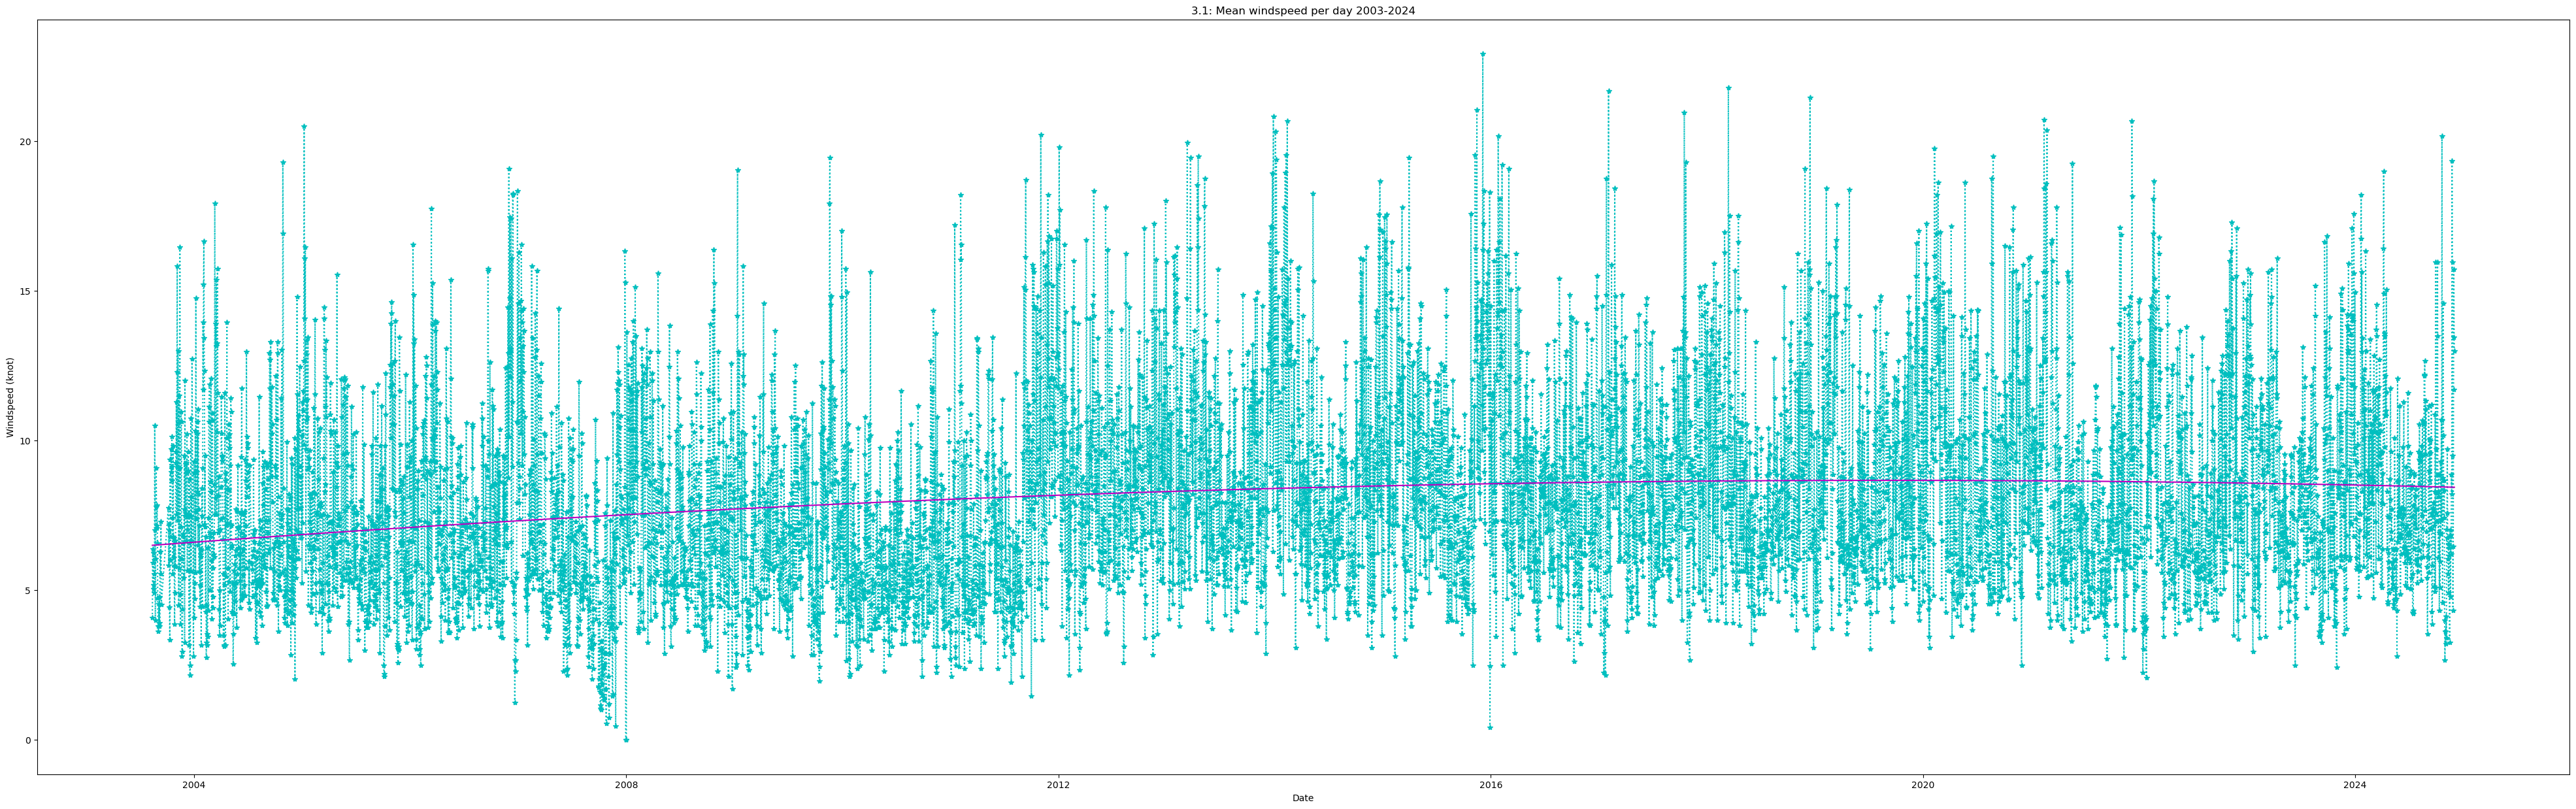

In [71]:
# calculate mean figures for each numerical column per day
mean_per_day=df.groupby([df.index]).mean(numeric_only =True)

# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp=mean_per_day["wdsp"]
wdsp=wdsp.to_numpy()
dates = mean_per_day.index
dates_num = mdates.date2num(dates)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("3.1: Mean windspeed per day 2003-2024")

ax.plot(mean_per_day.index, wdsp, "*:c")
# plot trendline
ax.plot(dates_num, np.poly1d(np.polyfit(dates_num, wdsp, 2))(dates_num), '-m') # reference 4

A program for creating a scrollable version of the above plot is available [here](mean-windspeed-plot.py).

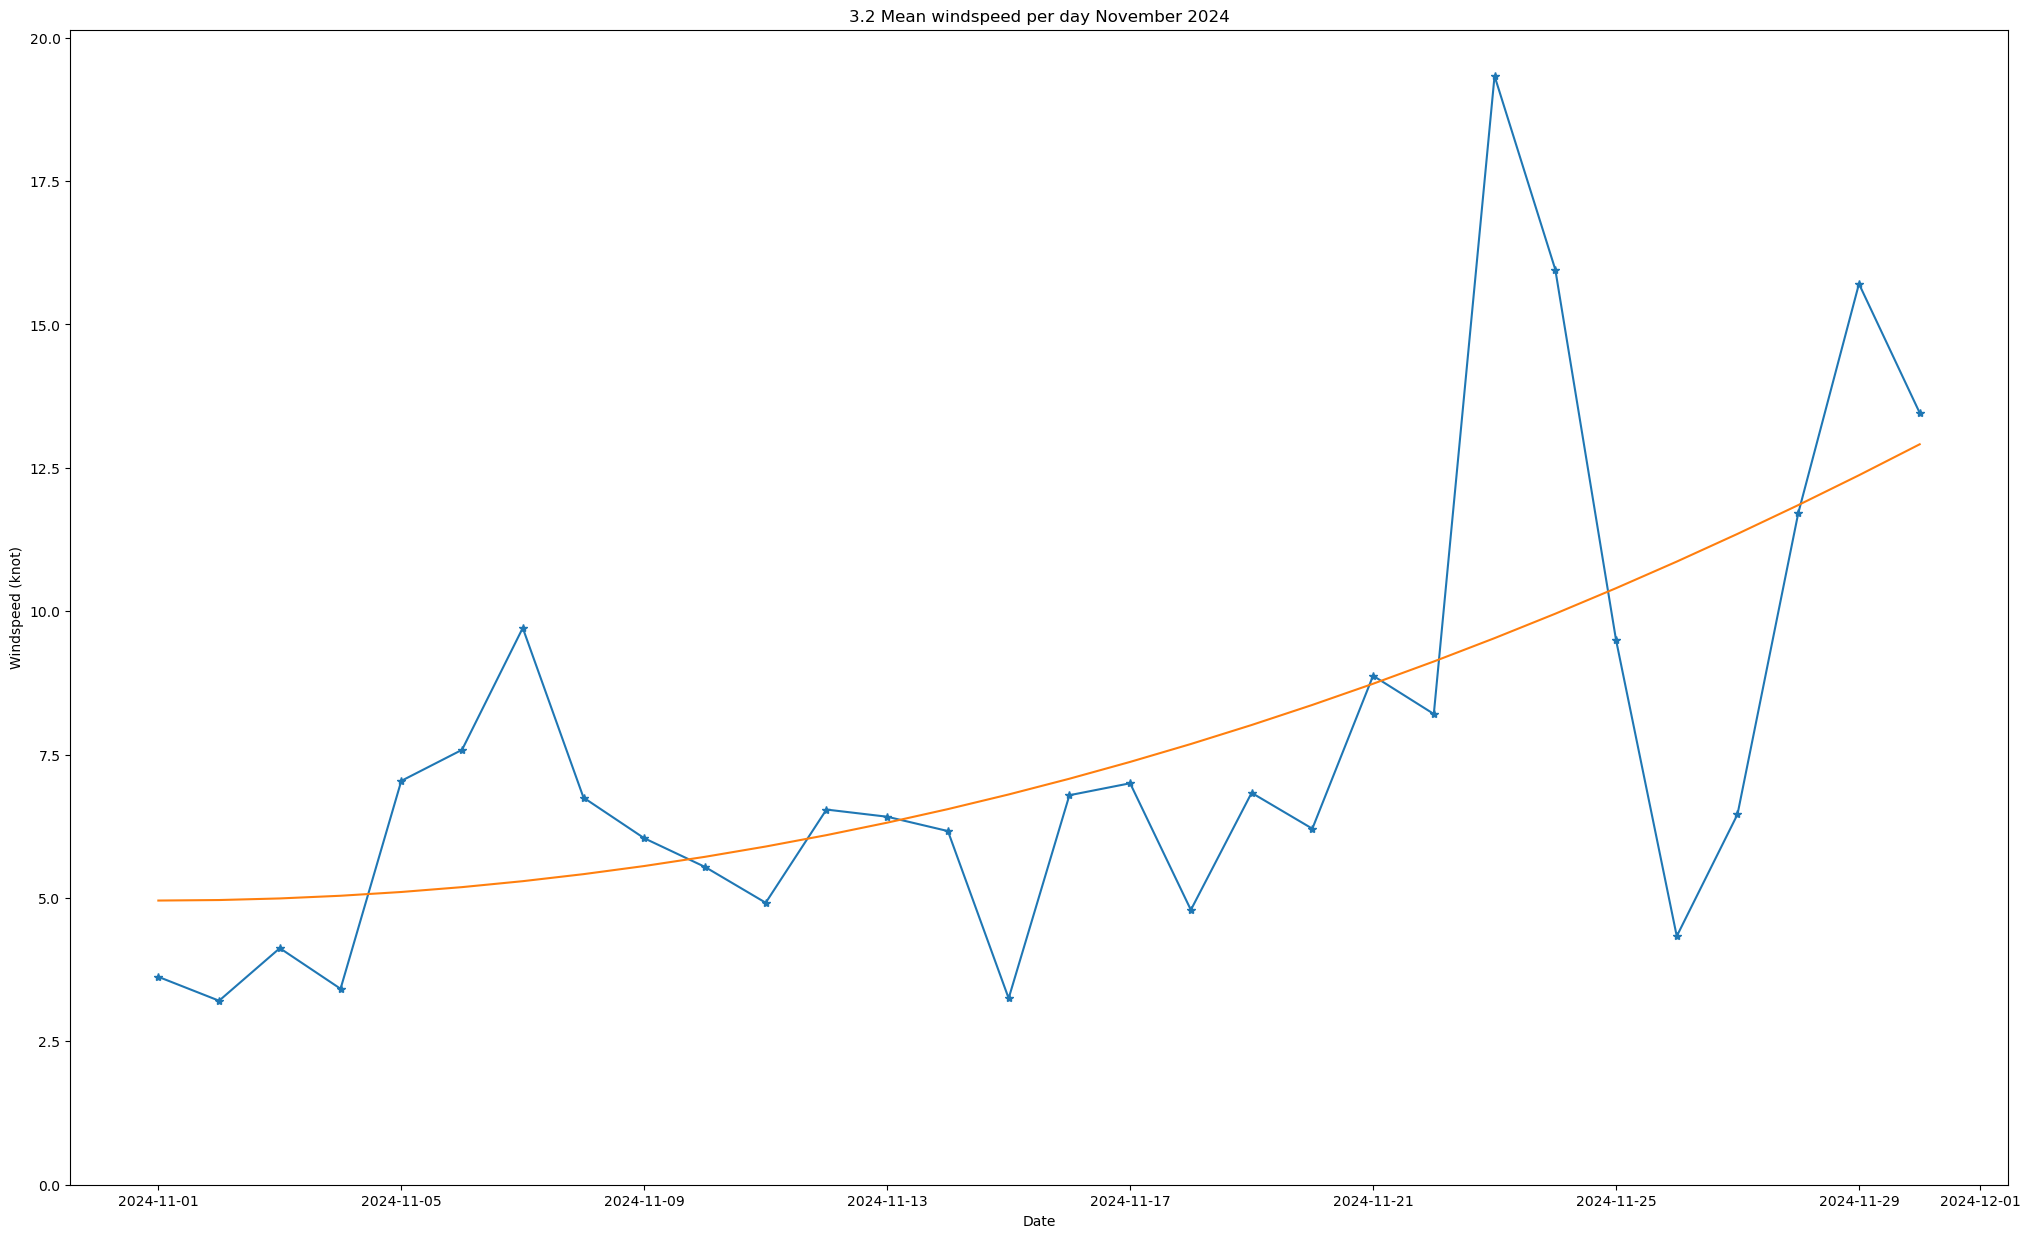

In [72]:
# take the section of the dataset covering november 2024
november=df.iloc[185051:185771]
# calculate the mean values for november 2024
nov_means=november.groupby([november.index]).mean(numeric_only =True)

# plot windspeed vs date
fig, ax = plt.subplots(figsize=(25,15))

nov_wdsp=nov_means["wdsp"]
nov_wdsp=nov_wdsp.to_numpy()
nov_dates=nov_means.index
nov_dates_num=mdates.date2num(nov_dates)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("3.2 Mean windspeed per day November 2024")

ax.plot(nov_means.index, nov_wdsp, "*-")
ax.set_ylim(ymin=0)
# plot trendline
ax.plot(nov_dates_num, np.poly1d(np.polyfit(nov_dates_num, nov_wdsp, 2))(nov_dates_num)) # reference 4

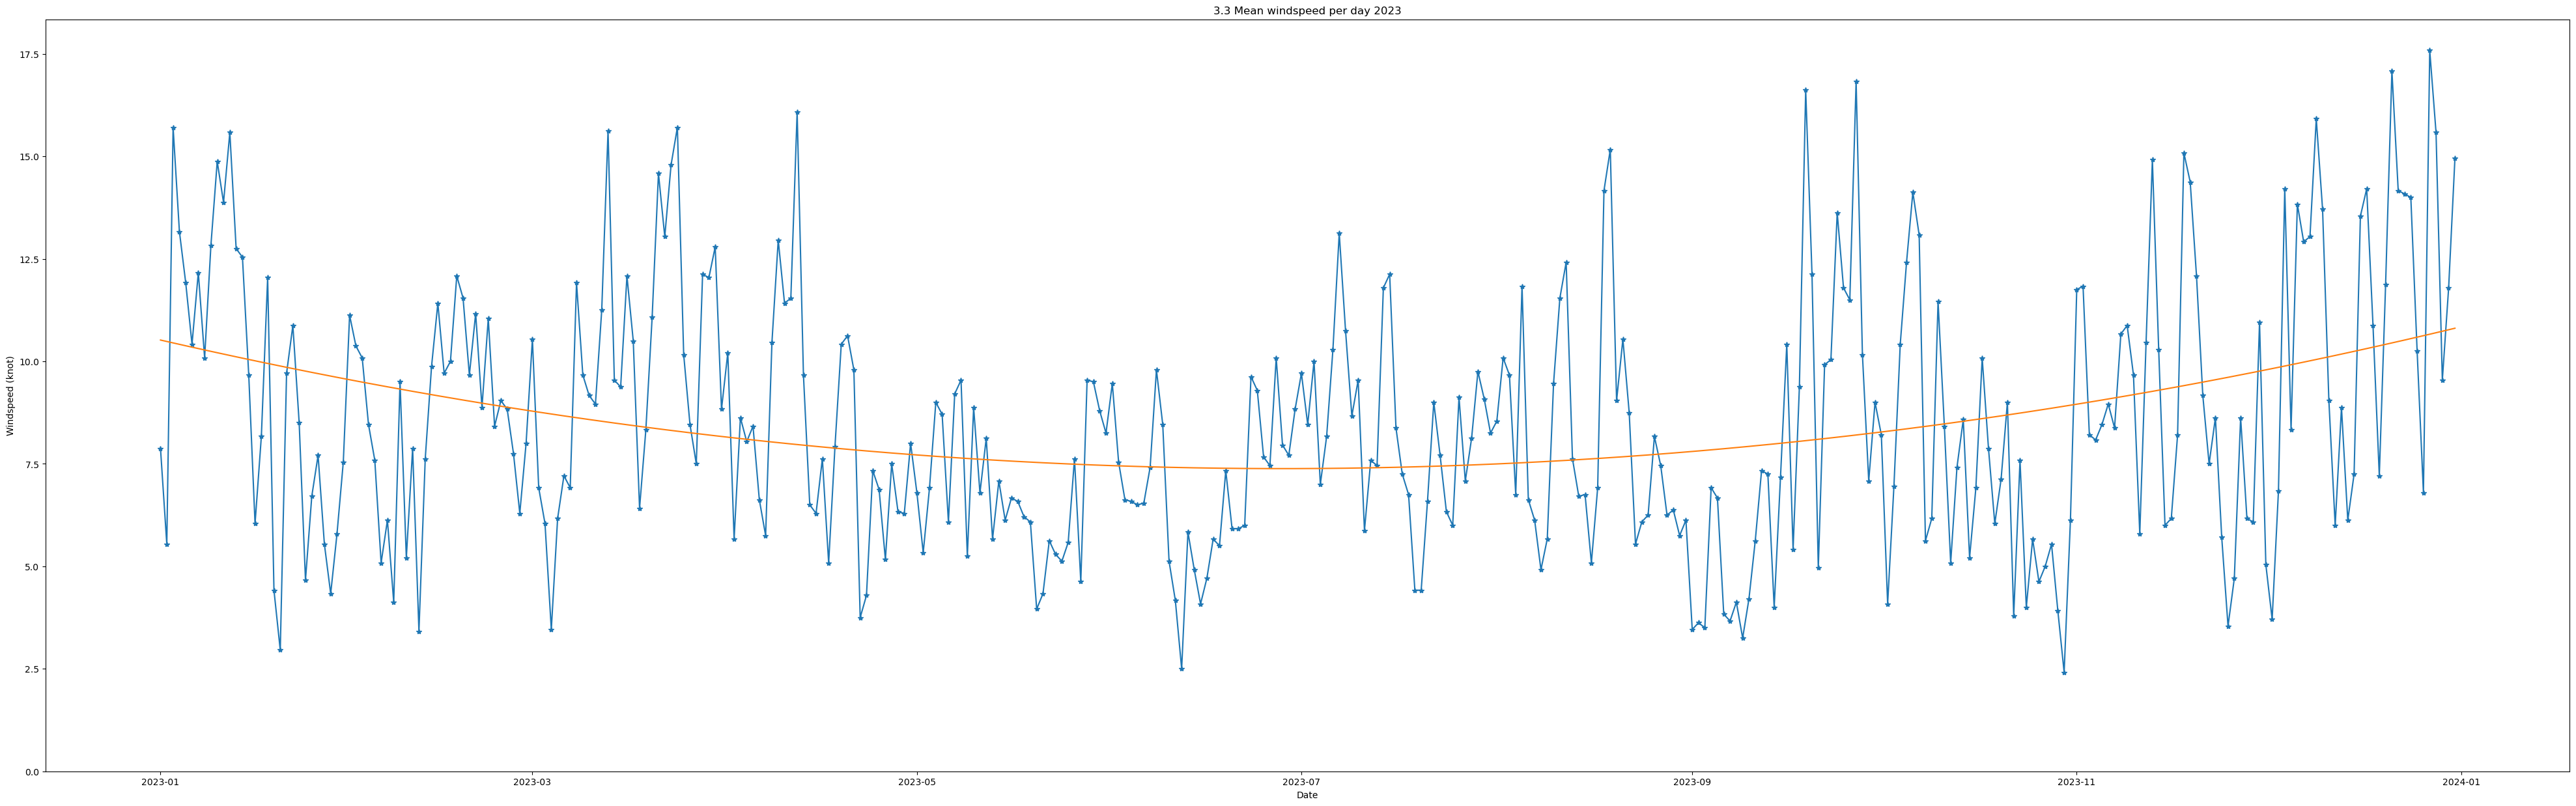

In [73]:
# take the section of the dataset covering 2023
full_year_2023=df.iloc[168971:177731]
# calculate the mean values for 2023
means_2023=full_year_2023.groupby([full_year_2023.index]).mean(numeric_only =True) 

# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp_2023=means_2023["wdsp"]
wdsp_2023=wdsp_2023.to_numpy()
dates_2023=means_2023.index
dates_2023_num=mdates.date2num(dates_2023)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("3.3 Mean windspeed per day 2023")

ax.plot(means_2023.index, wdsp_2023, "*-")
ax.set_ylim(ymin=0)
# plot trendline
ax.plot(dates_2023_num, np.poly1d(np.polyfit(dates_2023_num, wdsp_2023, 2))(dates_2023_num)) # reference 4

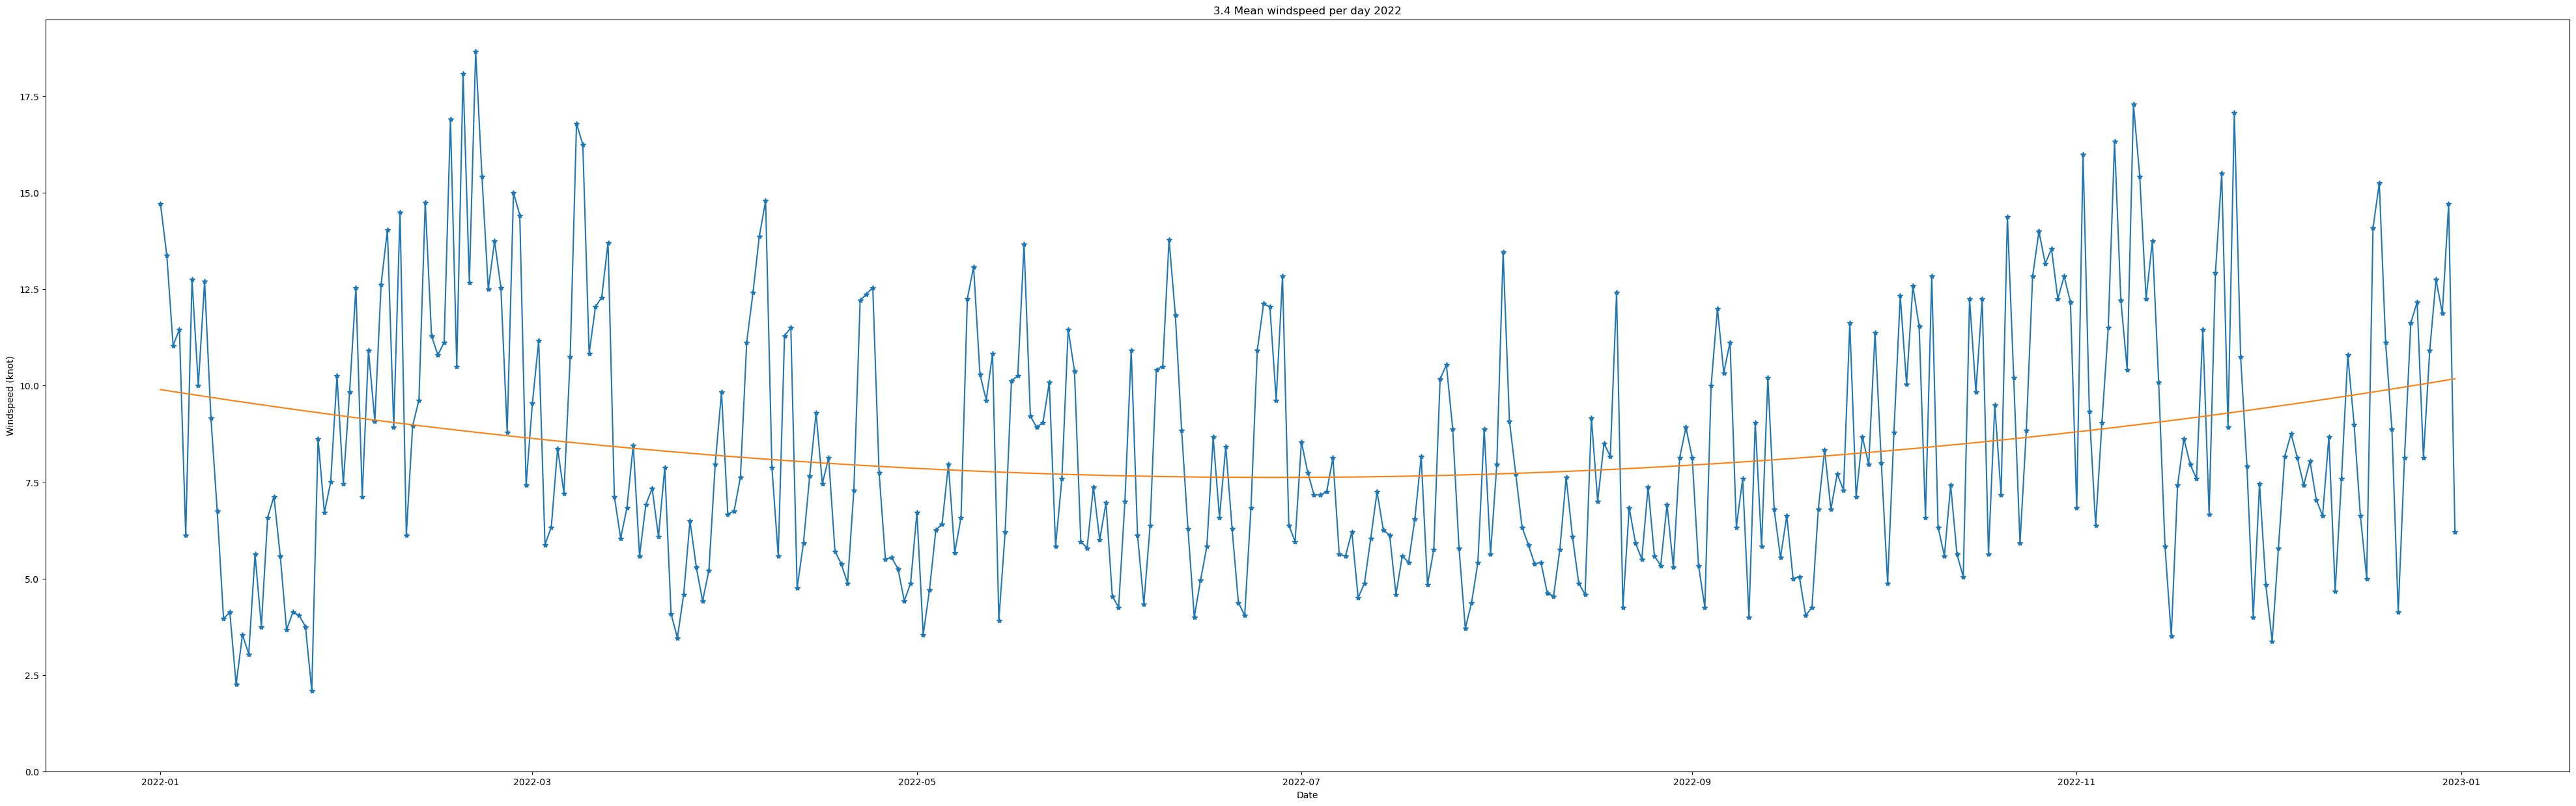

In [74]:
# take the section of the dataset covering 2022
full_year_2022=df.iloc[160211:168971]
# calculate the mean values for 2022
means_2022=full_year_2022.groupby([full_year_2022.index]).mean(numeric_only =True)

# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp_2022=means_2022["wdsp"]
wdsp_2022=wdsp_2022.to_numpy()
dates_2022=means_2022.index
dates_2022_num=mdates.date2num(dates_2022)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("3.4 Mean windspeed per day 2022")

ax.plot(means_2022.index, wdsp_2022, "*-")
ax.set_ylim(ymin=0)
# plot trendline
ax.plot(dates_2022_num, np.poly1d(np.polyfit(dates_2022_num, wdsp_2022, 2))(dates_2022_num)) # reference 4

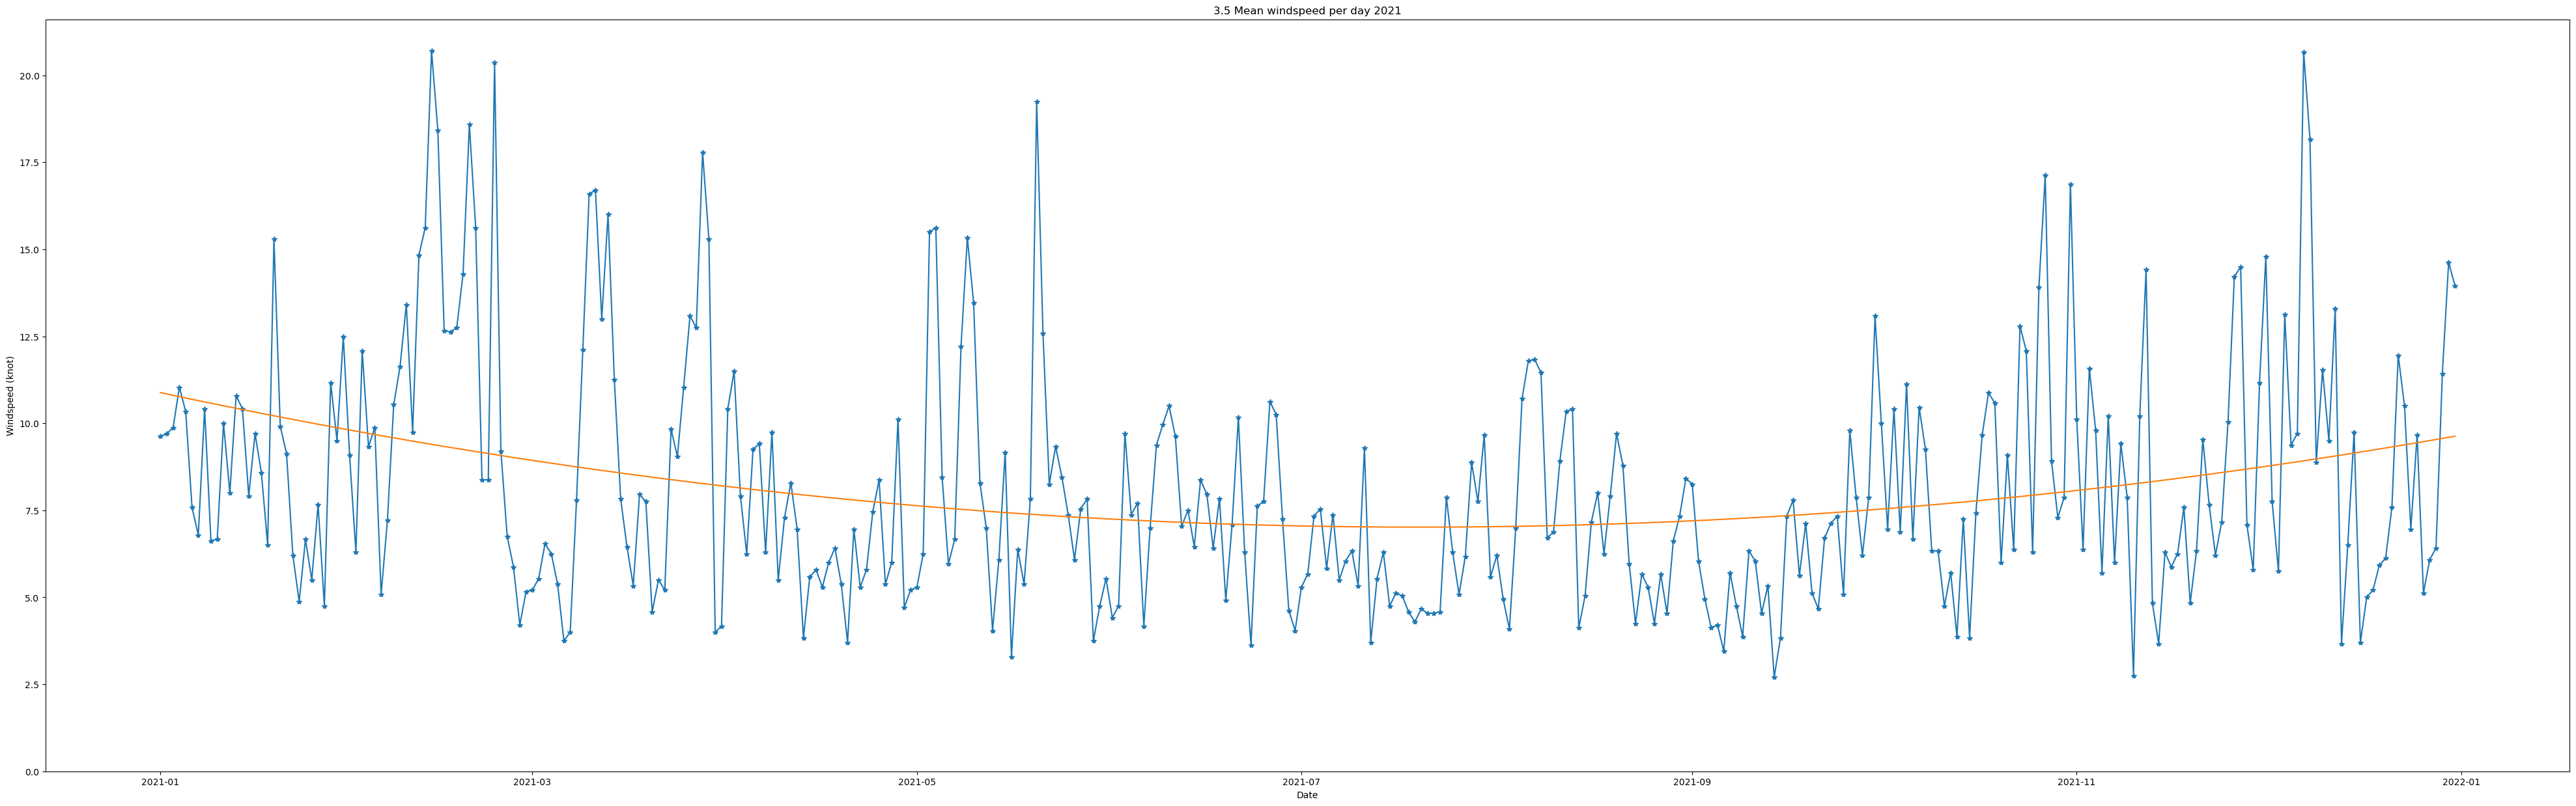

In [75]:
# take the section of the dataset covering 2021
full_year_2021=df.iloc[151451:160211]
# calculate the mean values for 2021
means_2021=full_year_2021.groupby([full_year_2021.index]).mean(numeric_only =True)

# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp_2021=means_2021["wdsp"]
wdsp_2021=wdsp_2021.to_numpy()
dates_2021=means_2021.index
dates_2021_num=mdates.date2num(dates_2021)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("3.5 Mean windspeed per day 2021")

ax.plot(means_2021.index, wdsp_2021, "*-")
ax.set_ylim(ymin=0)
# plot trendline
ax.plot(dates_2021_num, np.poly1d(np.polyfit(dates_2021_num, wdsp_2021, 2))(dates_2021_num)) # reference 4